# **Data Visualization Report 2**

### **Title**: `Dimensionality Reduction and Visualization Techniques`

`Name:`
Emmanuel


`Professor:`
Dr. Hao Yanbin

In this assignment, I will explore the application of various dimensionality reduction and visualization techniques on three different datasets: `MNIST` handwritten digits dataset, `ANSUR II` anthropometric dataset, and `IMDB` movie reviews dataset. The primary objective is to understand the effectiveness of different methods in capturing and visualizing the underlying structures of high-dimensional data.


## Introduction:
Dimensionality reduction techniques such as `LDA`, `Truncated SVD`, `t-SNE`, `MDS`, and `UMAP`, play a crucial role in simplifying complex datasets while preserving important information. By reducing the number of features or dimensions, these techniques aid in visualizing data, identifying patterns, and improving computational efficiency in machine learning tasks.

## `1. MNIST Dataset Exploration`
The MNIST dataset consists of 28x28 grayscale images of handwritten digits (0-9). With 60,000 training images and 10,000 testing images, it serves as a benchmark for image classification tasks. Below, I will proceed to show steps to preprocess and then visualize the MNIST dataset with reduced dimensionality.

#### `a` Install necessary packages

In [ ]:
!pip install pandas numpy scipy keras

#### `b` Import necessary Libraries

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from umap import umap_ as UMAP
from sklearn.preprocessing import StandardScaler


#### `c` Load Data from CSV

In [129]:
# Load Data from CSV
train = pd.read_csv("MNIST/mnist_train.csv")
test = pd.read_csv("MNIST/mnist_test.csv")


#### `d` Preprocess Data

In [130]:
# Split data
y_train = train['label']
X_train = train.drop(['label'], axis=1)

# Normalize data
X_train = X_train / 255
test = test / 255


#### `e` Visualize Single Digit

IMAGE LABEL: 2


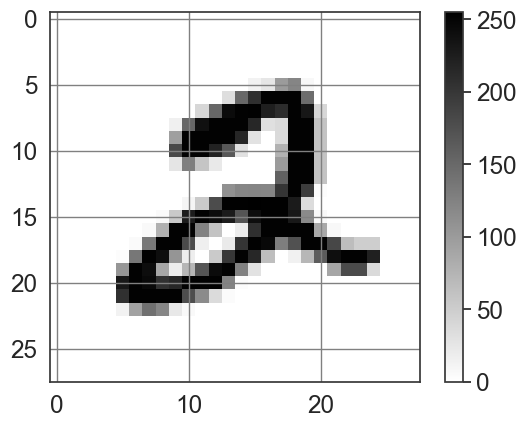

In [131]:
# Visualize single digit
digit_array = train.loc[5, "1x1":]
arr = np.array(digit_array) 
image_array = np.reshape(arr, (28,28))

digit_img = plt.imshow(image_array, cmap=plt.cm.binary)
plt.colorbar(digit_img)
print("IMAGE LABEL: {}".format(train.loc[5, "label"]))


#### `f` Generate 10 Plots of Images

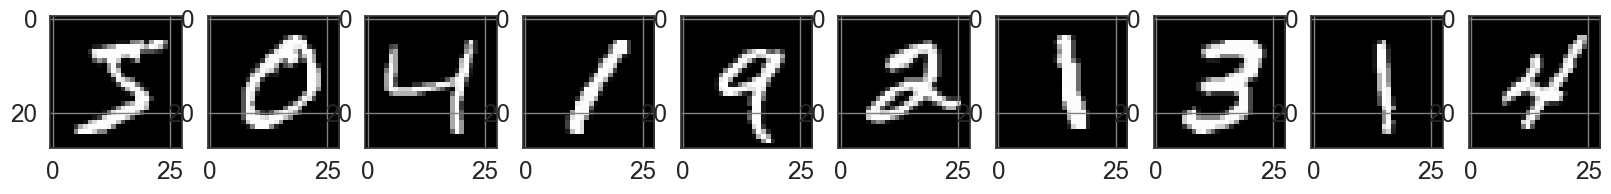

In [132]:
n = 10
fig, ax = plt.subplots(1, n, figsize=(20, 4))
for i in range(n):
    ax[i].imshow(train.iloc[i, 0:784].to_numpy().reshape(28, -1), cmap='gray')
plt.show()


#### `g` Dimensionality Reduction and Visualization of MNIST Dataset

In [133]:
# Reshape for Dimensionality Reduction
X_train_reshaped = X_train.values.reshape(len(X_train), -1)

#### `Principal Component Analysis (PCA)`
`PCA` is a linear dimensionality reduction technique that seeks to project data onto a lower-dimensional subspace while preserving the maximum variance. In the context of the MNIST dataset, `PCA` can help visualize the distribution of handwritten digits in a lower-dimensional space while retaining the most significant features.

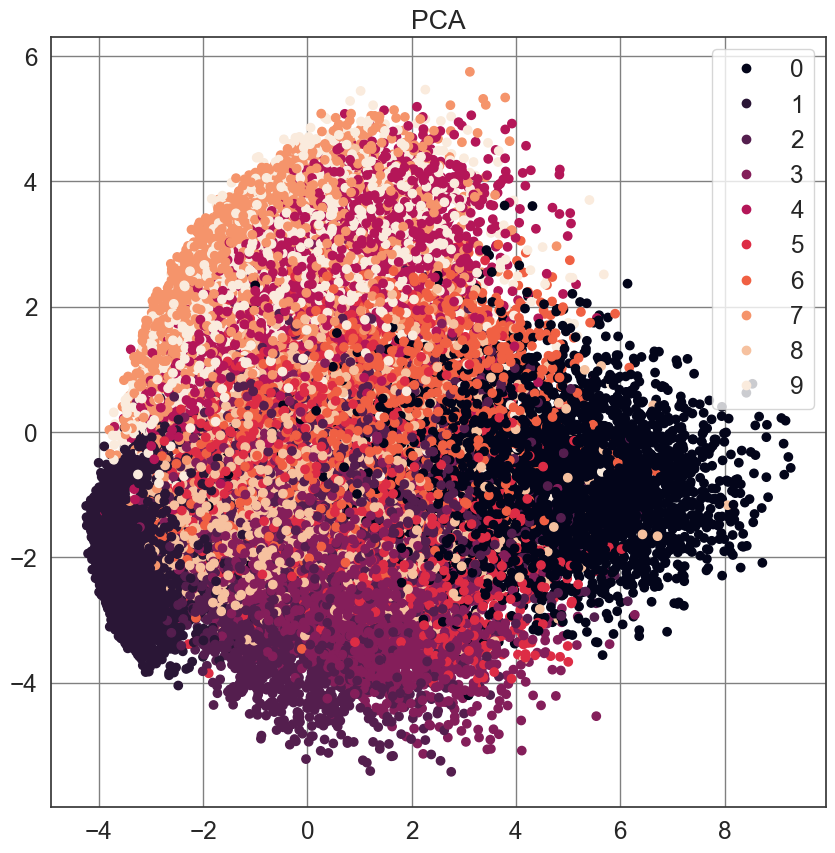

In [134]:
# PCA
x_pca = PCA(n_components=2).fit_transform(X_train_reshaped)

plt.figure(figsize=(10,10))
sc = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_train)
plt.legend(handles=sc.legend_elements()[0], labels=list(range(10)))
plt.title("PCA")
plt.show()


#### `Linear Discriminant Analysis (LDA)`
Unlike `PCA`, `LDA` is a supervised dimensionality reduction technique that considers class labels during the projection. It aims to maximize the separation between classes while minimizing the variance within each class. In the case of the MNIST dataset, `LDA` can potentially yield better separation between digits compared to `PCA`.

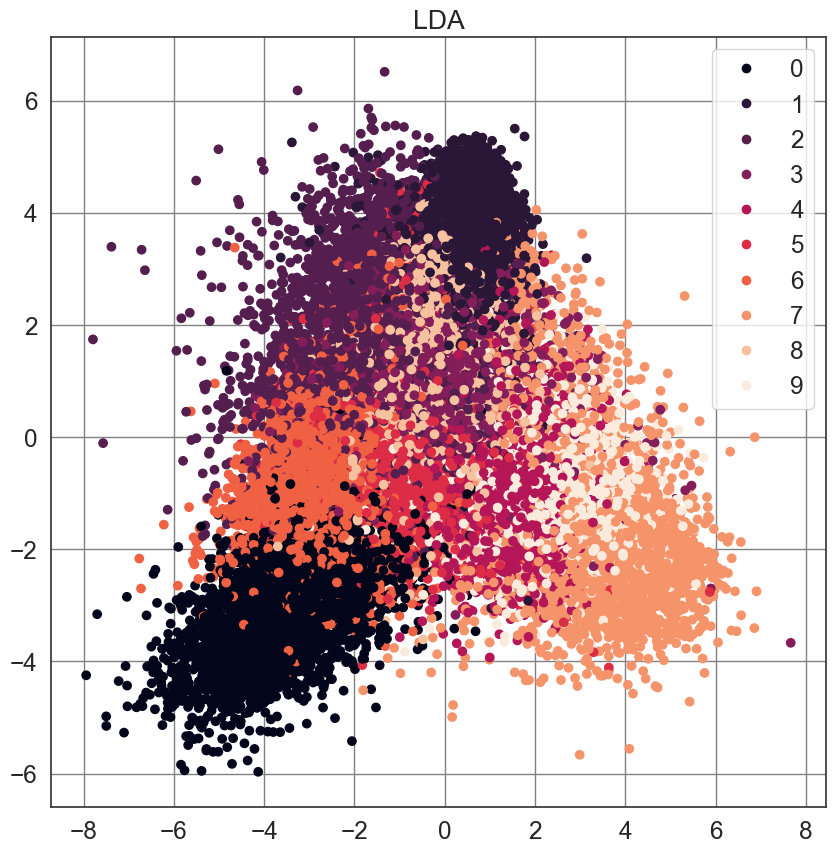

In [135]:
# LDA
x_lda = LDA(n_components=2).fit_transform(X_train_reshaped, y_train)

plt.figure(figsize=(10,10))
sc = plt.scatter(x_lda[:, 0], x_lda[:, 1], c=y_train)
plt.legend(handles=sc.legend_elements()[0], labels=list(range(10)))
plt.title("LDA")
plt.show()


#### `t-distributed Stochastic Neighbor Embedding (t-SNE)`
`t-SNE` is a nonlinear dimensionality reduction technique particularly effective in preserving local similarities in high-dimensional data. It is often used for visualizing complex datasets in lower-dimensional spaces. In the MNIST dataset, `t-SNE` can help reveal clusters and local structures within the handwritten digits, providing insights into their similarities and differences.

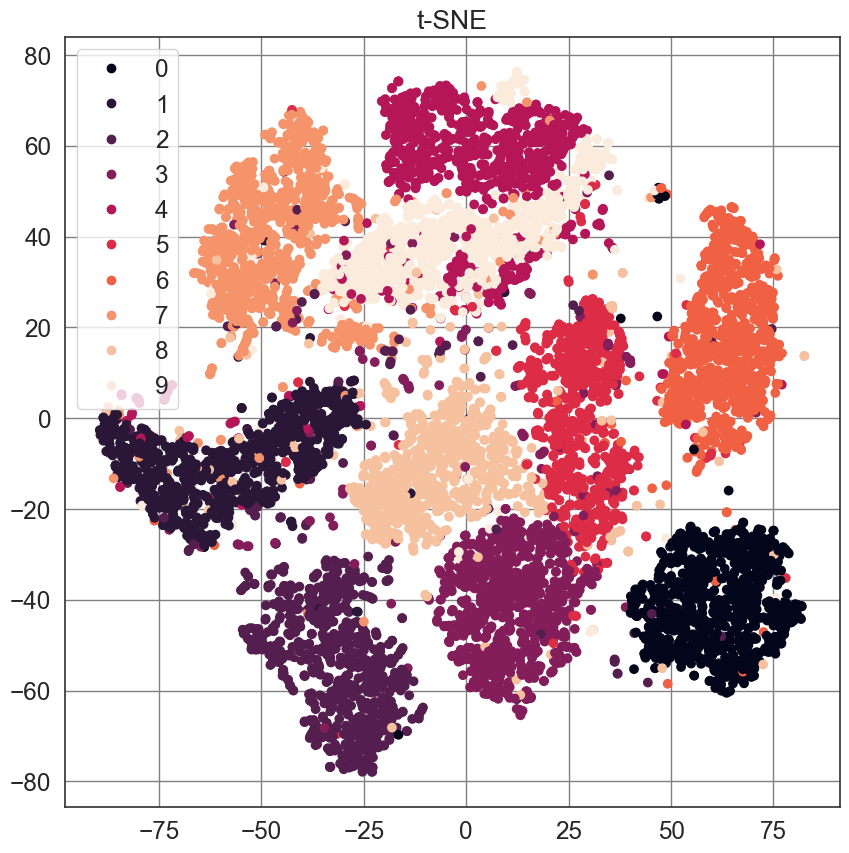

In [136]:
# t-SNE
x_tsne = TSNE(n_jobs=-1).fit_transform(X_train_reshaped[:10000])

plt.figure(figsize=(10,10))
sc = plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y_train[:10000])
plt.legend(handles=sc.legend_elements()[0], labels=list(range(10)))
plt.title("t-SNE")
plt.show()


#### `Uniform Manifold Approximation and Projection (UMAP)`
`UMAP` is a recently developed dimensionality reduction technique known for its scalability and ability to capture both local and global structures in data. It offers improvements over `t-SNE` in terms of speed and preservation of global structures. In the context of MNIST, `UMAP` can provide a more comprehensive visualization of the dataset, capturing both local and global relationships between digits.

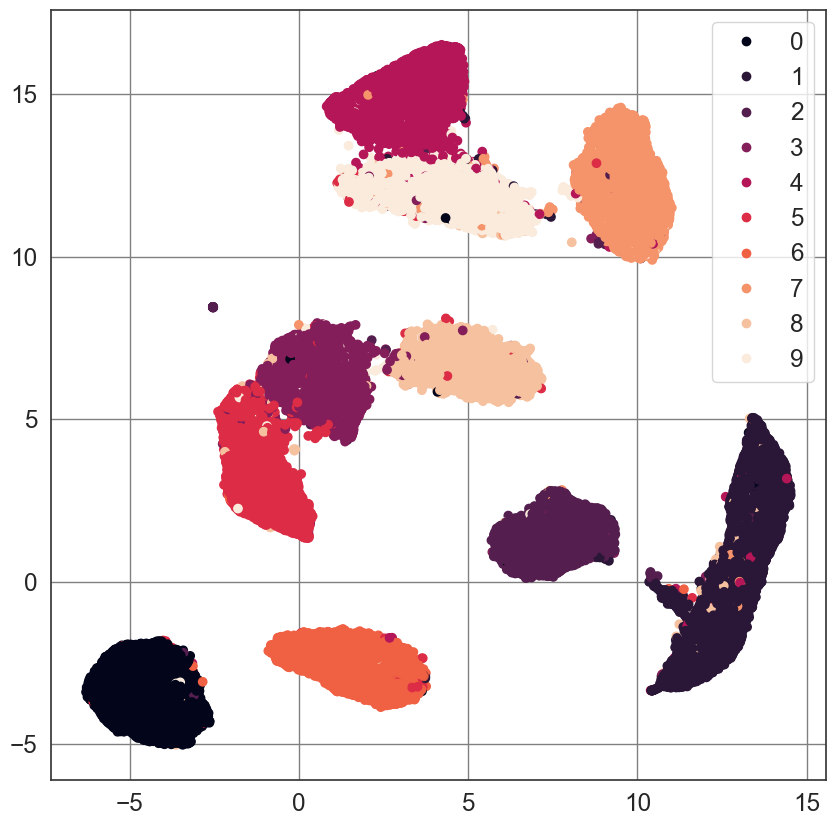

In [137]:
# UMAP
from umap import umap_ as umap

# Create an instance of the UMAP class
umap_model = umap.UMAP(n_neighbors=10, min_dist=0.1, metric='correlation')

# Fit the model and transform the data
x_umap = umap_model.fit_transform(X_train_reshaped)


plt.figure(figsize=(10,10))
sc = plt.scatter(x_umap[:, 0], x_umap[:, 1], c=y_train)
plt.legend(handles=sc.legend_elements()[0], labels=list(range(10)))
plt.show()

## `2. ANSUR II Dataset Analysis`
The ANSUR II dataset comprises anthropometric measurements collected from male and female military personnel. It includes a wide range of physical attributes such as height, weight, body circumferences, and limb lengths.

#### `a` Import Necessary Libraries

In [138]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS

#### `b` Load Datasets

In [139]:
# set the output to see more columns
pd.set_option('display.max_columns', None)

#### `Male`

In [140]:
# Load dataset
# ANSUR II MALE Public.csv
males = 'ANSUR II/ANSUR_II_MALE.csv'
ansur_male = pd.read_csv(males, encoding = 'ISO-8859-1')
ansur_male.head()


Branch     Component Gender  \
0             Combat Arms  Regular Army   Male   
1          Combat Support  Regular Army   Male   
2          Combat Support  Regular Army   Male   
3  Combat Service Support  Regular Army   Male   
4  Combat Service Support  Regular Army   Male   

   abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                             266            1467                    337   
1                             233            1395                    326   
2                             287            1430                    341   
3                             234            1347                    310   
4                             250            1585                    372   

   anklecircumference  axillaheight  balloffootcircumference  \
0                 222          1347                      253   
1                 220          1293                      245   
2                 230          1327                      256   
3                 230          1239                      262   
4                 247          1478                      267   

   balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
0               202                401                        369   
1               193                394                        338   
2               196                427                        408   
3               199                401                        359   
4               224                435                        356   

   bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  \
0               274               493                  71               319   
1               257               479                  67               344   
2               261               544                  75               345   
3               262               518                  73               328   
4               263               524                  80               340   

   bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  \
0                        291                 142                   979   
1                        320                 135                   944   
2                        330                 135                  1054   
3                        309                 143                   991   
4                        310                 138                  1029   

   buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  \
0           240            882                619                     509   
1           232            870                584                     468   
2           258            901                623                     506   
3           242            821                560                     437   
4           275           1080                706                     567   

   calfcircumference  cervicaleheight  chestbreadth  chestcircumference  \
0                373             1535           291                1074   
1                357             1471           269                1021   
2                412             1501           288                1120   
3                395             1423           296                1114   
4                425             1684           304                1048   

   chestdepth  chestheight  crotchheight  crotchlengthomphalion  \
0         259         1292           877                    607   
1         253         1244           851                    615   
2         267         1288           854                    636   
3         262         1205           769                    590   
4         232         1452          1014                    682   

   crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  \
0                             351          36         71             19   
1                             376          33         62             18   

#### `Female`

In [141]:
# Load dataset
# ANSUR II FEMALE Public.csv
females = 'ANSUR II/ANSUR_II_FEMALE.csv'
ansur_female = pd.read_csv(females, encoding = 'ISO-8859-1')
ansur_female.head()

Branch     Component  Gender  \
0          Combat Support  Regular Army  Female   
1  Combat Service Support  Regular Army  Female   
2  Combat Service Support  Regular Army  Female   
3  Combat Service Support  Regular Army  Female   
4             Combat Arms  Regular Army  Female   

   abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                             231            1282                    301   
1                             194            1379                    320   
2                             183            1369                    329   
3                             261            1356                    306   
4                             309            1303                    308   

   anklecircumference  axillaheight  balloffootcircumference  \
0                 204          1180                      222   
1                 207          1292                      225   
2                 233          1271                      237   
3                 214          1250                      240   
4                 214          1210                      217   

   balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
0               177                373                        315   
1               178                372                        272   
2               196                397                        300   
3               188                384                        364   
4               182                378                        320   

   bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  \
0               263               466                  65               338   
1               250               430                  64               294   
2               276               450                  69               309   
3               276               484                  68               340   
4               336               525                  67               300   

   bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  \
0                        301                 141                  1011   
1                        270                 126                   893   
2                        270                 128                   987   
3                        294                 144                  1012   
4                        295                 135                  1281   

   buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  \
0           223            836                587                     476   
1           186            900                583                     483   
2           204            861                583                     466   
3           253            897                599                     471   
4           284            811                607                     467   

   calfcircumference  cervicaleheight  chestbreadth  chestcircumference  \
0                360             1336           274                 922   
1                350             1440           261                 839   
2                384             1451           287                 874   
3                372             1430           269                1008   
4                433             1362           305                1089   

   chestdepth  chestheight  crotchheight  crotchlengthomphalion  \
0         245         1095           759                    557   
1         206         1234           835                    549   
2         223         1226           821                    643   
3         285         1170           804                    640   
4         290         1112           726                    686   

   crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  \
0                             310          35         65             16   
1                             329          32         60            

#### `c` Combine Male and Female Data

In [142]:
ansur = pd.concat([ansur_male, ansur_female])
ansur.shape

(6068, 99)

#### `d` Data Description

In [143]:
ansur.describe()

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
count                     6068.000000     6068.000000            6068.000000   
mean                       246.468688     1406.161338             327.374423   
std                         37.400106       79.091048              20.720018   
min                        155.000000     1115.000000             249.000000   
25%                        219.000000     1350.000000             313.000000   
50%                        242.000000     1410.000000             328.000000   
75%                        271.000000     1462.000000             341.250000   
max                        451.000000     1683.000000             393.000000   

       anklecircumference  axillaheight  balloffootcircumference  \
count         6068.000000   6068.000000               6068.00000   
mean           224.891397   1299.608767                244.19265   
std             16.051833     72.022286                 16.84502   
min            156.000000   1038.000000                186.00000   
25%            214.000000   1249.000000                232.00000   
50%            225.000000   1302.000000                245.00000   
75%            235.000000   1349.000000                256.00000   
max            293.000000   1553.000000                306.00000   

       balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
count       6068.000000        6068.000000                6068.000000   
mean         194.754614         399.204186                 340.934245   
std           13.516368          30.236914                  41.519866   
min          151.000000         283.000000                 216.000000   
25%          185.000000         376.000000                 311.000000   
50%          195.000000         404.000000                 341.000000   
75%          204.000000         421.000000                 370.000000   
max          245.000000         489.000000                 490.000000   

       bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  \
count       6068.000000       6068.000000         6068.000000   
mean         274.735003        490.754450           72.252637   
std           19.221034         42.135535            5.344590   
min          197.000000        357.000000           55.000000   
25%          262.000000        460.000000           68.000000   
50%          274.000000        492.000000           72.000000   
75%          288.000000        520.000000           76.000000   
max          362.000000        637.000000           91.000000   

       bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  \
count       6068.000000                6068.000000         6068.000000   
mean         324.896506                 306.636124          139.723467   
std           17.087501                  20.794166            7.308457   
min          267.000000                 245.000000          116.000000   
25%          314.000000                 292.000000          135.000000   
50%          326.000000                 307.000000          140.000000   
75%          336.000000                 321.000000          145.000000   
max          385.000000                 390.000000          174.000000   

       buttockcircumference  buttockdepth  buttockheight  buttockkneelength  \
count           6068.000000   6068.000000    6068.000000        6068.000000   
mean            1020.084707    241.619974     870.152274         608.999176   
std               76.422643     26.482986      54.822574          33.792839   
min              737.000000    168.000000     656.000000         466.000000   
25%              968.000000    222.000000     832.000000         586.000000   
50%             1017.000000    241.000000     868.000000         609.000000   
75%             1068.000000    259.000000     906.250000         632.000000   
max             1341.000000    349.000000    1080.000000         736.000000   

       buttockpopliteallength  calfcircumference  

#### `e` Remove Features Without Variance and Encode Categorical Columns

In [144]:
# %%
# The features without variance
# Demographic columns
demo_cols = ['subjectid', 'Gender', 'Date', 'Ethnicity', 'SubjectsBirthLocation', 'SubjectNumericRace', 'DODRace', 'Age',
             'Heightin', 'Weightlbs', 'WritingPreference', 'Installation', 'Component', 'Branch', 'PrimaryMOS']


# Drop columns that exist in demo_cols_exist
ansur_numeric = ansur.drop(demo_cols_exist, axis=1)

# Import necessary module
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Apply Label Encoder to categorical columns
ansur_numeric = ansur.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)

# %%
# Create a t-SNE model with adjusted perplexity
ansur_tsne = TSNE(perplexity=10, learning_rate=50)  # adjust perplexity as needed

# Fit and transform the t-SNE model on the numeric dataset
ansur_tsne_features = ansur_tsne.fit_transform(ansur_numeric)
ansur_tsne_features.shape


(6068, 2)

#### `f` Dimensionality Reduction and Visualization of ANSUR II Dataset

#### `t-distributed Stochastic Neighbor Embedding (t-SNE)`
`t-SNE` (t-distributed Stochastic Neighbor Embedding) is chosen for dimensionality reduction and visualization in the ANSUR II dataset due to its effectiveness in capturing local structures and revealing clusters within high-dimensional data. Since the ANSUR II dataset contains anthropometric measurements of both male and female subjects, `t-SNE` can help visualize the distribution of these measurements in a lower-dimensional space while preserving important relationships between them. By projecting the data onto a two-dimensional plane, `t-SNE` allows for the identification of patterns and clusters that may exist within the dataset, providing insights into the differences and similarities between male and female subjects.

In [145]:
ansur['TSNE1'] = ansur_tsne_features[:, 0]
ansur['TSNE2'] = ansur_tsne_features[:, 1]
ansur.head()

Branch     Component Gender  \
0             Combat Arms  Regular Army   Male   
1          Combat Support  Regular Army   Male   
2          Combat Support  Regular Army   Male   
3  Combat Service Support  Regular Army   Male   
4  Combat Service Support  Regular Army   Male   

   abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                             266            1467                    337   
1                             233            1395                    326   
2                             287            1430                    341   
3                             234            1347                    310   
4                             250            1585                    372   

   anklecircumference  axillaheight  balloffootcircumference  \
0                 222          1347                      253   
1                 220          1293                      245   
2                 230          1327                      256   
3                 230          1239                      262   
4                 247          1478                      267   

   balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
0               202                401                        369   
1               193                394                        338   
2               196                427                        408   
3               199                401                        359   
4               224                435                        356   

   bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  \
0               274               493                  71               319   
1               257               479                  67               344   
2               261               544                  75               345   
3               262               518                  73               328   
4               263               524                  80               340   

   bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  \
0                        291                 142                   979   
1                        320                 135                   944   
2                        330                 135                  1054   
3                        309                 143                   991   
4                        310                 138                  1029   

   buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  \
0           240            882                619                     509   
1           232            870                584                     468   
2           258            901                623                     506   
3           242            821                560                     437   
4           275           1080                706                     567   

   calfcircumference  cervicaleheight  chestbreadth  chestcircumference  \
0                373             1535           291                1074   
1                357             1471           269                1021   
2                412             1501           288                1120   
3                395             1423           296                1114   
4                425             1684           304                1048   

   chestdepth  chestheight  crotchheight  crotchlengthomphalion  \
0         259         1292           877                    607   
1         253         1244           851                    615   
2         267         1288           854                    636   
3         262         1205           769                    590   
4         232         1452          1014                    682   

   crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  \
0                             351          36         71             19   
1                             376          33         62             18   

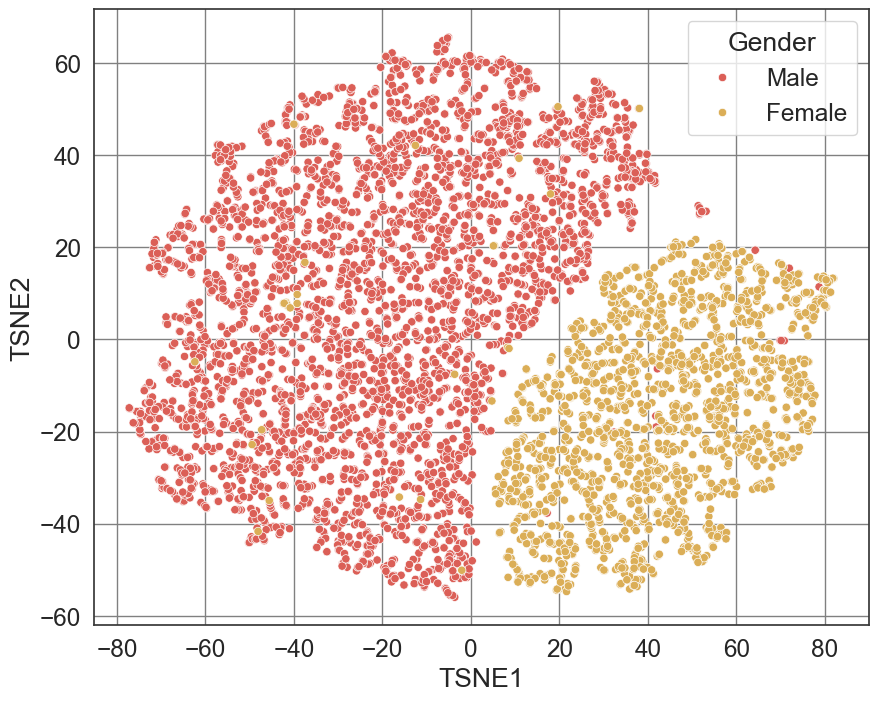

In [146]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 8))  # You can adjust the numbers as needed

# Visualize t-SNE dimensionality
sns.scatterplot(ansur,
 x='TSNE1',
 y='TSNE2',
 hue='Gender',
 palette=sns.hls_palette(10),
 legend='full')

# Show the plot
plt.show()


#### `Principal Component Analysis (PCA)`
`PCA` (Principal Component Analysis) is employed as another dimensionality reduction technique for the ANSUR II dataset. `PCA` aims to find orthogonal axes in the data space that capture the maximum variance. By projecting the data onto these axes, `PCA` effectively reduces the dimensionality of the dataset while retaining as much variance as possible. In the context of the ANSUR II dataset, `PCA` can help identify the principal components that contribute the most to the variation in anthropometric measurements. Visualizing the dataset in the reduced space of the first two principal components allows for a better understanding of the overall structure and distribution of the data.

In [147]:
# Create the scaler and standardize the data
scaler = StandardScaler()
std_ansur_pca = scaler.fit_transform(ansur_numeric)
# Create the PCA instance and fit and transform the data
pca = PCA(n_components=2) # select the number of components
ansur_pca_t = pca.fit_transform(std_ansur_pca)
ansur['PC1'] = ansur_pca_t[:, 0]
ansur['PC2'] = ansur_pca_t[:, 1]

<Axes: xlabel='PC1', ylabel='PC2'>

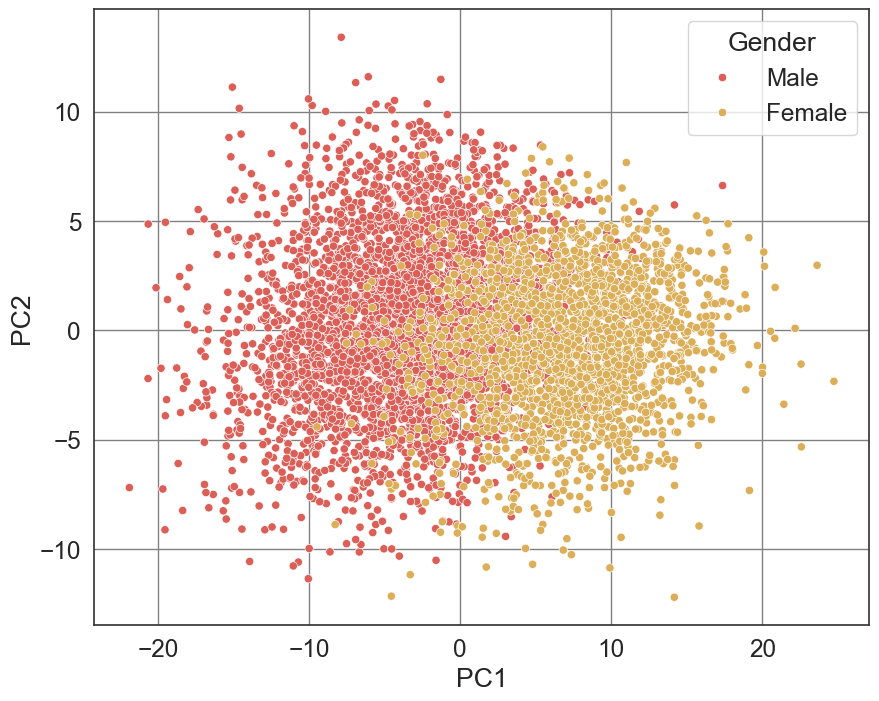

In [148]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 8))  # You can adjust the numbers as needed


# Visualize PCA dimensionality
sns.scatterplot(ansur,
 x='PC1',
 y='PC2',
 hue='Gender',
 palette=sns.hls_palette(10),
 legend='full')

#### `Multidimensional Scaling (MDS)`
`MDS` (Multidimensional Scaling) is utilized for dimensionality reduction and visualization in the ANSUR II dataset. `MDS` aims to find a low-dimensional representation of the data that preserves the pairwise distances between data points as much as possible. In the ANSUR II dataset, `MDS` can help visualize the similarities and differences between male and female subjects based on their anthropometric measurements. By embedding the data in a two-dimensional space while preserving the distances between subjects, `MDS` facilitates the exploration of relationships and clusters within the dataset, providing insights into the overall structure of the data.

In [149]:
MDS
# Create the scaler and standardize the data
scaler = StandardScaler()
std_ansur_mds = scaler.fit_transform(ansur_numeric)
# Create the MDS instance and fit and transform the data
ansur_mds = MDS(n_components=2)
ansur_mds_t = ansur_mds.fit_transform(std_ansur_mds)
ansur['MDS1'] = ansur_mds_t[:, 0]
ansur['MDS2'] = ansur_mds_t[:, 1]


<Axes: xlabel='MDS1', ylabel='MDS2'>

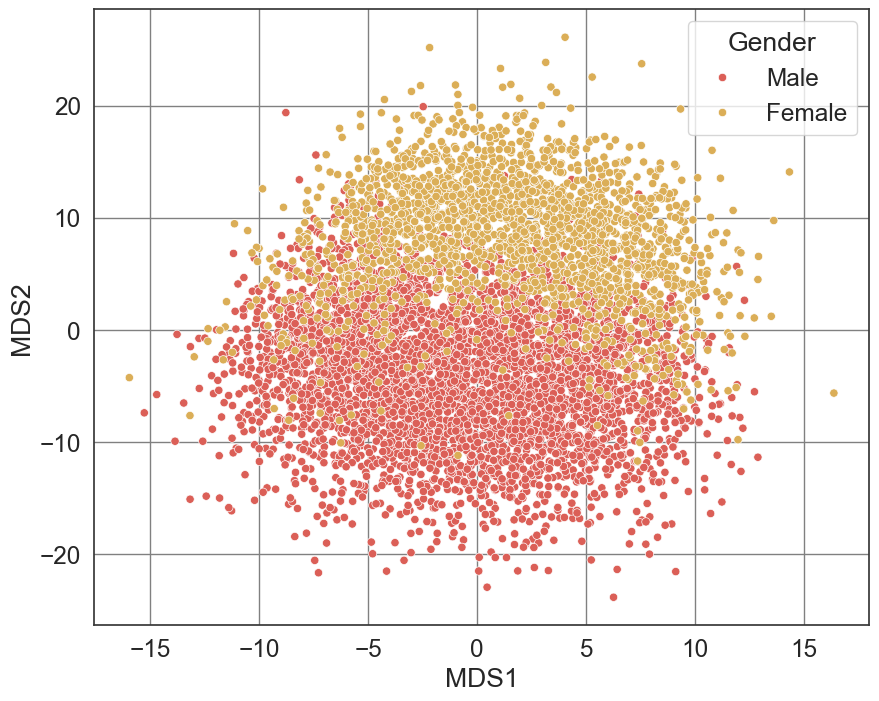

In [150]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 8))  # You can adjust the numbers as needed


# Visualize MDS dimensionality
sns.scatterplot(ansur,
 x='MDS1',
 y='MDS2',
 hue='Gender',
 palette=sns.hls_palette(10),
 legend='full')

## `3. IMDB Dataset Analysis`
The IMDB dataset consists of 50,000 movie reviews labeled as either positive or negative sentiments. With a large corpus of text data, it presents challenges in understanding and analyzing sentiment patterns.

#### `a` Install Necessary Packages

In [ ]:
!pip install spacy scikit-learn umap-learn

#### `b` Import Necessary Libraries

In [152]:
import spacy

In [153]:
import spacy.cli
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [154]:
import spacy.cli
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [155]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Core
import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set(style="whitegrid", rc={"axes.edgecolor":"#383838", "grid.color": "#808080"}, font_scale=1.6)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
from bs4 import BeautifulSoup
import re

# sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

#### `b` Load IMDB Dataset

In [156]:
df = pd.read_csv('IMDB Dataset of 50K Movie Reviews/IMDB Dataset.csv')
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

#### `c` Preprocess Text Data

In [157]:
df.shape

(50000, 2)

In [158]:
#the first review
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [159]:
df.duplicated().sum()

418

In [160]:
df.drop_duplicates()

review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[49582 rows x 2 columns]

In [161]:
df['review'] = df['review'].str.lower()
df.head()

review sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production. <br /><br />the...  positive
2  i thought this was a wonderful way to spend ti...  positive
3  basically there's a family where a little boy ...  negative
4  petter mattei's "love in the time of money" is...  positive

In [162]:
df['review'] = df['review'].str.strip()
df.head()

review sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production. <br /><br />the...  positive
2  i thought this was a wonderful way to spend ti...  positive
3  basically there's a family where a little boy ...  negative
4  petter mattei's "love in the time of money" is...  positive

In [163]:
df['review'] = df['review'].str.replace(r'<.*?>','',regex = True)
df.head()

review sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production. the filming tec...  positive
2  i thought this was a wonderful way to spend ti...  positive
3  basically there's a family where a little boy ...  negative
4  petter mattei's "love in the time of money" is...  positive

In [164]:
df["sentiment"] = df["sentiment"].replace("positive",1).replace("negative",0)
df.head()

review  sentiment
0  one of the other reviewers has mentioned that ...          1
1  a wonderful little production. the filming tec...          1
2  i thought this was a wonderful way to spend ti...          1
3  basically there's a family where a little boy ...          0
4  petter mattei's "love in the time of money" is...          1

#### `d` Split Data and Vectorize Text

In [165]:
# Split features and labels
X = df["review"]
y = df["sentiment"]

# Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

# Print train target distribution
print(y_train.value_counts())

sentiment
1    20000
0    20000
Name: count, dtype: int64


#### `e` Tokenize Text with SpaCy

In [166]:
# Load English language model
nlp = spacy.load("en_core_web_sm")

# Disable named-entity recognition and parsing to save time
unwanted_pipes = ["ner", "parser"]

# Custom tokenizer using spacy
def custom_tokenizer(doc):
    with nlp.disable_pipes(*unwanted_pipes):
        return [t.lemma_ for t in nlp(doc) if not t.is_stop and not t.is_space and t.pos_ in ["ADJ","NOUN","VERB"]]

#### `f` Vectorize Text Data

In [167]:
%%time

# Bag-of-Words vectorizer
vectorizer = CountVectorizer(tokenizer=custom_tokenizer)

# Fit and transform train data
X_train_bow = vectorizer.fit_transform(X_train)

# Transform test data
X_test_bow = vectorizer.transform(X_test)

# Print vocab size
print("BoW vocabulary size:", X_train_bow.shape[1])

BoW vocabulary size: 90091
CPU times: total: 2min 50s
Wall time: 16min 27s


In [168]:
%%time

# TF-IDF vectorizer
vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer)

# Fit and transform train data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform test data
X_test_tfidf = vectorizer.transform(X_test)

# Print vocab size
print("TF-IDF vocabulary size:", X_train_tfidf.shape[1])

TF-IDF vocabulary size: 90091
CPU times: total: 2min 40s
Wall time: 16min 6s


#### Dimensionality Reduction and Visualization of IMDB Movies Reviews Dataset

#### `Truncated SVD (Singular Value Decomposition)`
`Truncated SVD` (Singular Value Decomposition) is chosen for dimensionality reduction and visualization in the IMDB dataset due to its efficiency in handling sparse matrices and its ability to capture the most significant components of the data. Since the IMDB dataset consists of text reviews of movies, which are typically high-dimensional and sparse, `Truncated SVD` can help reduce the dimensionality of the dataset while preserving important information about the reviews. By projecting the data onto a lower-dimensional space, `Truncated SVD` allows for the exploration of the underlying structure of the reviews, enabling the identification of patterns and trends that may exist within the dataset.

In [169]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_train_tfidf) # No need to convert to dense array


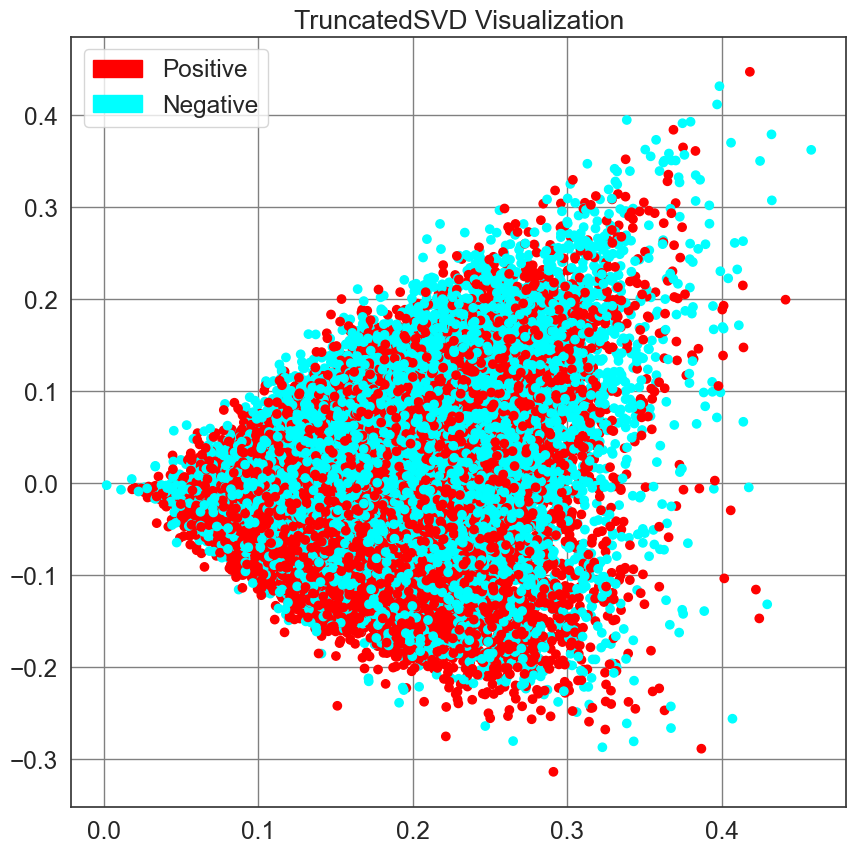

In [170]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# For TruncatedSVD
plt.figure(figsize=(10,10))

# Define colors based on y_train
colors = ['red' if label == 1 else 'cyan' for label in y_train]

plt.scatter(X_svd[:, 0], X_svd[:, 1], c=colors)

# Add a legend
red_patch = mpatches.Patch(color='red', label='Positive')
blue_patch = mpatches.Patch(color='cyan', label='Negative')
plt.legend(handles=[red_patch, blue_patch])

plt.title('TruncatedSVD Visualization')
plt.show()


#### `t-distributed Stochastic Neighbor Embedding (t-SNE)`
Similar to its application in the ANSUR II dataset, `t-SNE` is employed for dimensionality reduction and visualization in the IMDB dataset to capture local structures and reveal clusters within the high-dimensional data. By embedding the text reviews in a two-dimensional space while preserving their similarities, `t-SNE` facilitates the exploration of relationships between reviews and the identification of distinct groups or clusters based on their sentiment (positive or negative). Visualizing the dataset in the reduced space of `t-SNE` allows for a better understanding of the distribution of reviews and the presence of any underlying patterns or clusters within the data.

In [171]:
from sklearn.manifold import TSNE

# Use only the first 1000 instances to save time
X_subset = X_train_tfidf[:1000]
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_subset.toarray()) # Convert to dense array



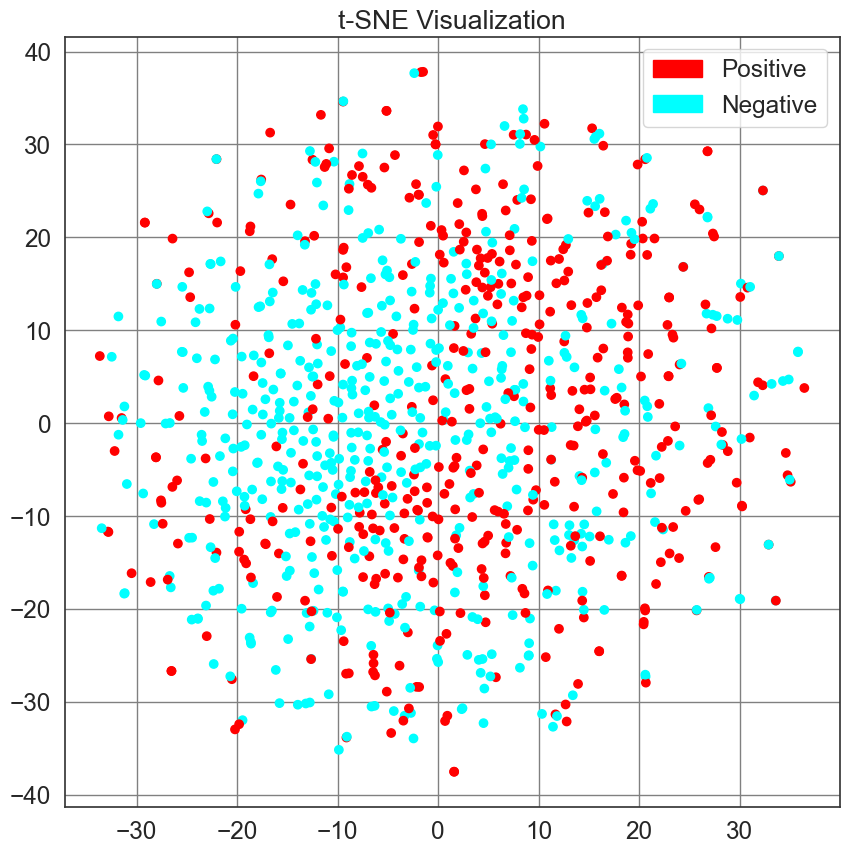

In [172]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# For t-SNE
plt.figure(figsize=(10,10))

# Define colors based on y_train subset
colors = ['red' if label == 1 else 'cyan' for label in y_train[:1000]]

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors)

# Add a legend
red_patch = mpatches.Patch(color='red', label='Positive')
blue_patch = mpatches.Patch(color='cyan', label='Negative')
plt.legend(handles=[red_patch, blue_patch])

plt.title('t-SNE Visualization')
plt.show()


#### `UMAP`
`UMAP` (Uniform Manifold Approximation and Projection) is utilized as another dimensionality reduction technique for the IMDB dataset. `UMAP` is known for its scalability and ability to capture both local and global structures in data. In the context of the IMDB dataset, `UMAP` can help visualize the relationships between text reviews in a lower-dimensional space while preserving both local similarities and global structures. By projecting the data onto a two-dimensional plane, `UMAP` enables the exploration of the underlying structure of the reviews and facilitates the identification of patterns and clusters that may exist within the dataset.

In [173]:
from umap import UMAP  # Import the UMAP class

# Apply UMAP
umap_model = UMAP(n_neighbors=10, min_dist=0.1, metric='correlation')
X_train_bow_umap = umap_model.fit_transform(X_train_bow)
X_test_bow_umap = umap_model.transform(X_test_bow)


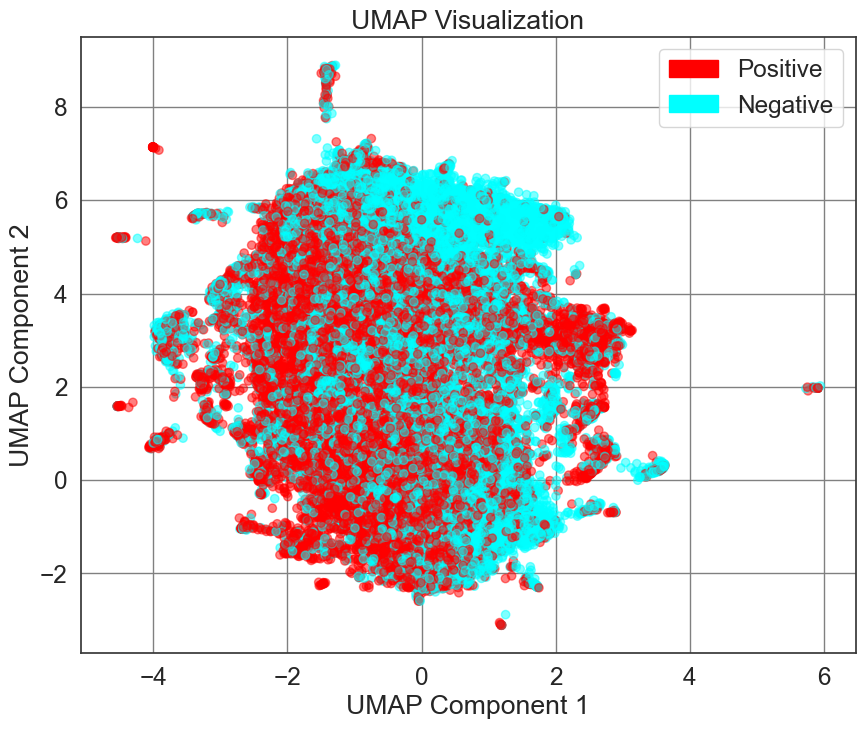

In [174]:
import matplotlib.pyplot as plt

# Visualization using scatter plot
plt.figure(figsize=(10, 8))

# Define colors based on y_train
colors = ['red' if label == 1 else 'cyan' for label in y_train]

plt.scatter(X_train_bow_umap[:, 0], X_train_bow_umap[:, 1], c=colors, alpha=0.5)

# Add legend
red_patch = mpatches.Patch(color='red', label='Positive')
blue_patch = mpatches.Patch(color='cyan', label='Negative')
plt.legend(handles=[red_patch, blue_patch])

plt.title('UMAP Visualization')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()


### `Conclusion`

In conclusion, the dimensionality reduction and visualization techniques employed in this assignment have provided valuable insights into the structure and patterns present in diverse datasets. By leveraging methods such as, `LDA`, `t-SNE`, `PCA`, `Truncated SVD`, `MDS`, and `UMAP`, I have effectively reduced high-dimensional data into lower-dimensional representations while preserving essential information. Through visualizations, we have gained a deeper understanding of the relationships and clusters within the datasets, enabling more informed analysis and interpretation. These techniques serve as powerful tools for exploring complex datasets and extracting meaningful insights for various applications.